# Importar
Correr todas las veces


## General


In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import fetch_openml
import pickle
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
from collections import Counter
import seaborn as sns

## NeuralMap

In [65]:
!pip  install neural-map

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from neural_map import NeuralMap, _plot


##UMAP

In [67]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import umap

## HDBSCAN

In [69]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

## Google Drive

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## tSNE

In [72]:
from sklearn.manifold import TSNE

# Carga de datos

In [73]:
iris_train = pd.read_csv('/content/drive/MyDrive/5to/sistemas_inteligentes/Iris/Iris.csv')


In [74]:
iris_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Normalización

In [75]:
# iris_train.columns = iris_train.columns.astype(str)
col_target = 'Species'
scaler = MinMaxScaler()
data = iris_train.drop(col_target, axis=1)
data = data.drop('Id', axis=1)
data = scaler.fit_transform(data)

# TRAIN **NO CORRER**

## NeuralMap


In [ ]:
# instanciación de la clase NeuralMap
som = NeuralMap(variables=data.shape[1], columns=8, rows=8, metric='cosine', hexagonal=False, toroidal=True)

In [ ]:
# entranemiento de la instancia
som.train(data=data, n_epochs=40)


Epoch:  1  of  40     Learning rate:  1.0     Radius:  4.0

Epoch:  2  of  40     Learning rate:  0.9746153846153847     Radius:  3.8603133226767294

Epoch:  3  of  40     Learning rate:  0.9492307692307692     Radius:  3.7255047373088623

Epoch:  4  of  40     Learning rate:  0.9238461538461539     Radius:  3.5954038927821674

Epoch:  5  of  40     Learning rate:  0.8984615384615384     Radius:  3.469846386927694

Epoch:  6  of  40     Learning rate:  0.8730769230769231     Radius:  3.3486735587746725

Epoch:  7  of  40     Learning rate:  0.8476923076923077     Radius:  3.231732288058291

Epoch:  8  of  40     Learning rate:  0.8223076923076923     Radius:  3.1188748017289925

Epoch:  9  of  40     Learning rate:  0.796923076923077     Radius:  3.009958487218793

Epoch:  10  of  40     Learning rate:  0.7715384615384615     Radius:  2.90484571222865

Epoch:  11  of  40     Learning rate:  0.7461538461538462     Radius:  2.8034036508091575

Epoch:  12  of  40     Learning rate:  0.72

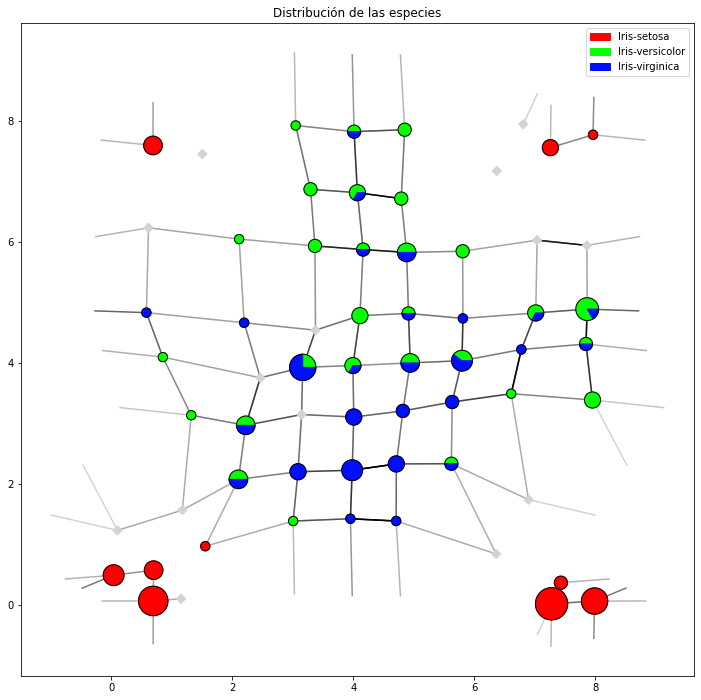

In [ ]:
som.plot_analysis(data, attached_values=iris_train[col_target].values, min_cluster_size=8, size=13, title='Distribución de las especies')

### Guardar modelo


In [ ]:
som_iris_dic = som.get_dict()

path = '/content/drive/MyDrive/5to/sistemas_inteligentes/Iris/som_iris_dic.pickle'

with open(path, "wb") as f:
  pickle.dump(som_iris_dic, f)

##UMAP

In [76]:
umap_model = umap.UMAP(
    n_components=2,
    random_state=0,
    min_dist= 0.0
).fit(data)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


[Text(0.5, 1.0, 'Iris data UMAP')]

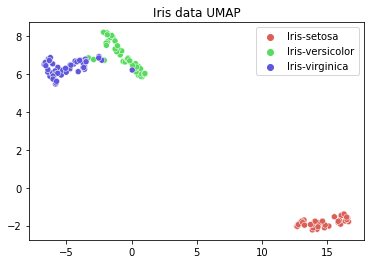

In [77]:
sns.scatterplot(x=umap_model.embedding_[:, 0], y=umap_model.embedding_[:, 1], hue=iris_train[col_target].values,
                palette=sns.color_palette("hls", len(np.unique(iris_train[col_target].values))),
                data=data).set(title="Iris data UMAP")

### Guardar modelo

In [78]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/Iris/umap_model_20.sav'

with open(path, "wb") as f:
  pickle.dump(umap_model, f)


## tSNE

In [ ]:
tsne_model = TSNE(
    n_components=2,
    learning_rate="auto",
    random_state=0,
    perplexity=15
)

In [ ]:
%%time
tsne_proyection = tsne_model.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


CPU times: user 9.41 s, sys: 32.4 ms, total: 9.44 s
Wall time: 10.4 s


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

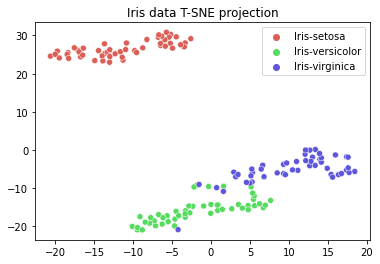

In [ ]:
sns.scatterplot(x=tsne_proyection[:,0], y=tsne_proyection[:,1], hue=iris_train[col_target].values,
                palette=sns.color_palette("hls", len(np.unique(iris_train[col_target].values))),
                data=data).set(title="Iris data T-SNE projection")

### Guardar modelo


In [ ]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/Iris/tsne_proyection.sav'

with open(path, "wb") as f:
  pickle.dump(tsne_proyection, f)

# Cargar instancias de modelos entrenados

## NeuralMap

In [13]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/Iris/som_iris_dic.pickle'
with open(path, 'rb') as f:
    som_20_dic = pickle.load(f)

In [14]:
som = NeuralMap(**som_20_dic)

In [15]:
# som.plot_analysis(data, attached_values=iris_train[col_target].values, min_cluster_size=8, size=13, title='Distribución de los Dígitos')

In [16]:
def get_nodes_of(self, data, attachments):
  output = pd.DataFrame(columns = ['node'])
  for ind, attachment in zip(data, attachments):
    output.loc[attachment] = [tuple(self.get_best_matching_unit(ind))]
  return output

In [17]:
nodes = get_nodes_of(som, data, attachments = iris_train.index)

## UMAP

In [18]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/Iris/clusterable_embedding.sav'
with open(path, 'rb') as f:
    clusterable_embedding = pickle.load(f)

clusterable_embedding = umap_model.embedding_

## tSNE

In [19]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/Iris/tsne_proyection.sav'

with open(path, 'rb') as f:
    tsne_proyection = pickle.load(f)

# Clusterización

## Preprocesamiento

In [20]:
evaluation_results = pd.DataFrame(columns = ['d_reduction_technique', 'clustering_algorithm', 'RI', 'AMI'])

### NeuralMap

#### Para evaluación numérica

In [21]:
cluster_evaluation_df = pd.DataFrame(columns = ['node', 'target', 'c_k_means', 'c_k_medoids', 'c_hdbscan'])

In [22]:
cluster_evaluation_df['node'] = nodes['node']
cluster_evaluation_df['target'] = iris_train[col_target]

#### Para evaluación gráfica

In [23]:
def most_frequent(List):
  if List:
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
  else:
    return 'noise'


In [24]:
species_dict = {'Iris-versicolor':0, 'Iris-virginica':1,'Iris-setosa':2,'noise':-1}

In [25]:
labels_digits = som.map_attachments(data, attachments=iris_train[col_target].values, aggregation_function=most_frequent)

In [26]:
i = 0
labels_target = np.full((labels_digits.shape[0], labels_digits.shape[1]), '', dtype=object)

while i < labels_digits.shape[0]:
  j = 0
  while j < labels_digits.shape[1]:
      labels_target[i][j] = labels_digits[i][j]
      j = j+1
  i = i+1
labels_target_num = np.vectorize(species_dict.get)(labels_target)

## HDBSCAN


### NeuralMap

#### Clusterización

In [27]:
som_hdbscan = som.hdbscan(min_cluster_size=5)
#cluster_selection_method='leaf'


In [28]:
labels_hdbscan = som_hdbscan[0]
for node in np.unique(cluster_evaluation_df['node'].values):
   indexs = cluster_evaluation_df[cluster_evaluation_df['node'] == node].index
   for index in indexs:
     cluster_evaluation_df.loc[index, 'c_hdbscan'] = labels_hdbscan[node[0]][node[1]]


#### Evaluación

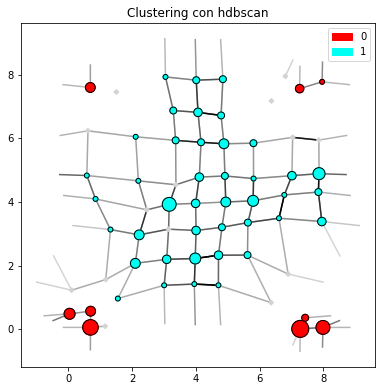

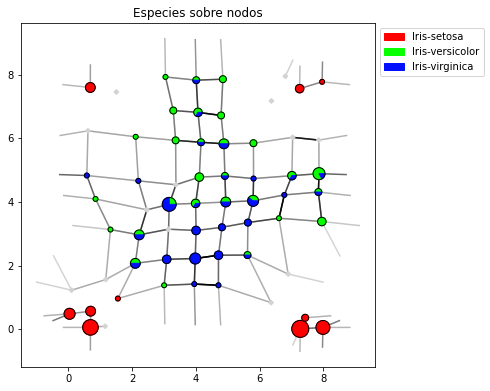

In [60]:
som.plot_analysis(data, attached_values=cluster_evaluation_df['c_hdbscan'].values, min_cluster_size=8, size=7, title='Clustering con hdbscan')
som.plot_analysis(data, attached_values=iris_train[col_target].values, min_cluster_size=8, size=7, title='Especies sobre nodos')


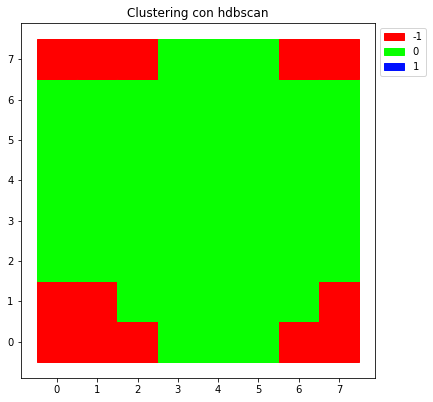

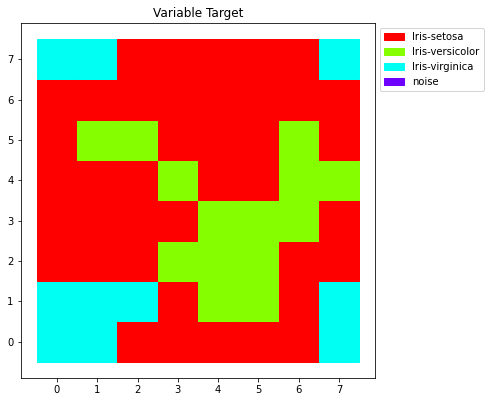

In [29]:
# _plot.tiles(som.positions, 
#          som.hexagonal, 
#          labels_hdbscan, 
#          norm=False, 
#          title='Clustering con hdbscan', 
#          labels=np.unique(labels_hdbscan),
#          size=7)

# _plot.tiles(som.positions, 
#           som.hexagonal, 
#           labels_target_num, 
#           norm=False, 
#           title='Variable Target', 
#           labels=np.unique(labels_target),
#           size=7)


In [30]:
evaluation = {'d_reduction_technique': 'neuralmap',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_hdbscan'].values),
              'AMI': adjusted_mutual_info_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_hdbscan'].values)
              }

evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

### UMAP

#### Clusterización

In [31]:
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=3).fit_predict(clusterable_embedding)

#### Evaluación

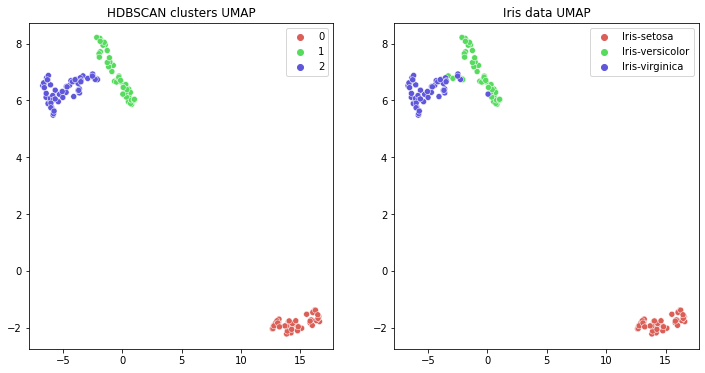

In [32]:
clustered = (hdbscan_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=clusterable_embedding[:, 0], 
                y=clusterable_embedding[:, 1], 
                hue=hdbscan_labels,
                palette=sns.color_palette("hls", len(np.unique(hdbscan_labels))),
                data=data, ax=ax[0]).set(title="HDBSCAN clusters UMAP")

sns.scatterplot(x=clusterable_embedding[:, 0], y=clusterable_embedding[:, 1], hue=iris_train[col_target].values,
                palette=sns.color_palette("hls", len(np.unique(iris_train[col_target].values))),
                data=data, ax=ax[1]).set(title="Iris data UMAP");

plt.show()

In [33]:
evaluation = {'d_reduction_technique': 'umap',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(iris_train[col_target].values, hdbscan_labels),
              'AMI': adjusted_mutual_info_score(iris_train[col_target].values, hdbscan_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)


### tSNE

#### Clusterización


In [34]:
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10, cluster_selection_method='leaf').fit_predict(tsne_proyection)

#### Evaluación

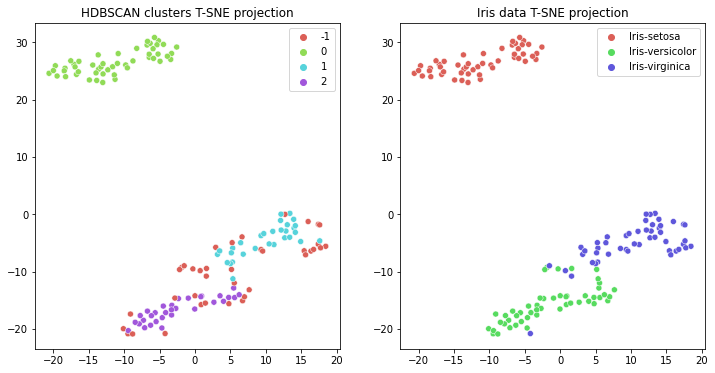

In [35]:
clustered = (hdbscan_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=hdbscan_labels,
                palette=sns.color_palette("hls", len(np.unique(hdbscan_labels))),
                data=data, ax=ax[0]).set(title="HDBSCAN clusters T-SNE projection")

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=iris_train[col_target].values,
                palette=sns.color_palette("hls", len(np.unique(iris_train[col_target].values))),
                data=data, ax=ax[1]).set(title="Iris data T-SNE projection")

plt.show()


In [36]:
evaluation = {'d_reduction_technique': 'tsne',
              'clustering_algorithm': 'hdbscan',
              'RI': adjusted_rand_score(iris_train[col_target].values, hdbscan_labels),
              'AMI': adjusted_mutual_info_score(iris_train[col_target].values, hdbscan_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

## KMeans


In [37]:
clusters = 3

### NeuralMap

#### Clusterización

In [38]:


labels_k_means, centers_k_means = som.k_means(clusters)


In [39]:
for node in np.unique(cluster_evaluation_df['node'].values):
   indexs = cluster_evaluation_df[cluster_evaluation_df['node'] == node].index
   for index in indexs:
     cluster_evaluation_df.loc[index, 'c_k_means'] = labels_k_means[node[0]][node[1]]

In [40]:
labels_k_medoids, centers_k_medoids = som.k_medoids(clusters)

In [41]:
for node in np.unique(cluster_evaluation_df['node'].values):
   indexs = cluster_evaluation_df[cluster_evaluation_df['node'] == node].index
   for index in indexs:
     cluster_evaluation_df.loc[index, 'c_k_medoids'] = labels_k_medoids[node[0]][node[1]]

#### Evaluación


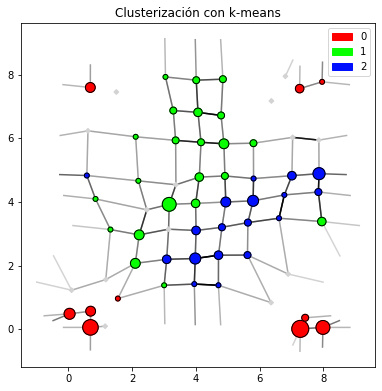

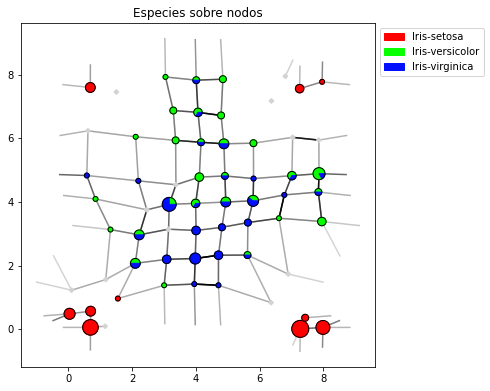

In [62]:
som.plot_analysis(data, attached_values=cluster_evaluation_df['c_k_means'].values, min_cluster_size=8, size=7, title='Clusterización con k-means')
som.plot_analysis(data, attached_values=iris_train[col_target].values, min_cluster_size=8, size=7, title='Especies sobre nodos')


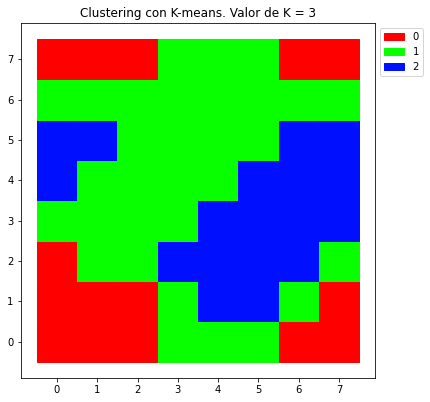

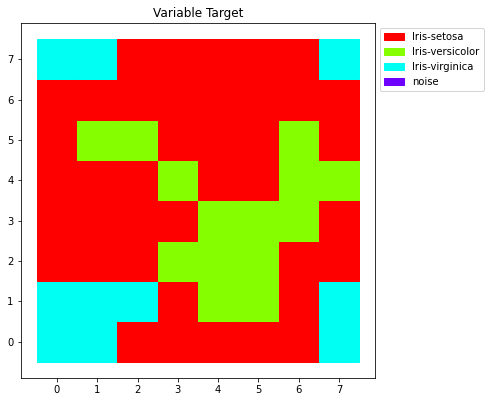

In [42]:

# _plot.tiles(som.positions, 
#          som.hexagonal, 
#          labels_k_means, 
#          norm=False, 
#          title='Clustering con K-means. Valor de K = ' + str(clusters), 
#          labels=list(range(clusters)),
#          size=7)

# _plot.tiles(som.positions, 
#           som.hexagonal, 
#           labels_target_num, 
#           norm=False, 
#           title='Variable Target', 
#           labels=np.unique(labels_target),
#           size=7)


adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0

adjusted_rand_score([0, 0, 1, 1], [1, 1, 0, 0])
1.0

In [43]:
evaluation = {'d_reduction_technique': 'neuralmap',
              'clustering_algorithm': 'k-means',
              'RI': adjusted_rand_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_means'].values),
              'AMI': adjusted_mutual_info_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_means'].values)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

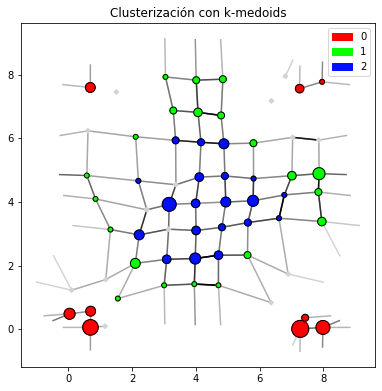

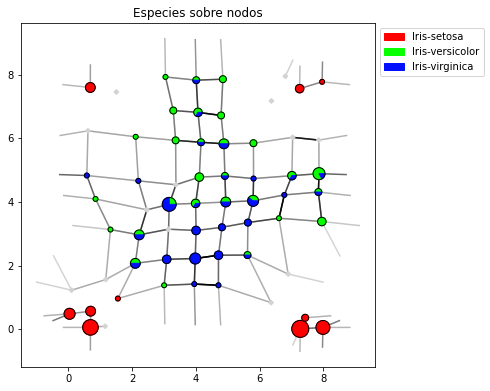

In [63]:
som.plot_analysis(data, attached_values=cluster_evaluation_df['c_k_medoids'].values, min_cluster_size=8, size=7, title='Clusterización con k-medoids')
som.plot_analysis(data, attached_values=iris_train[col_target].values, min_cluster_size=8, size=7, title='Especies sobre nodos')


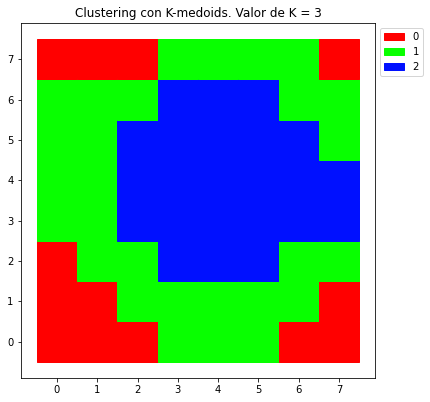

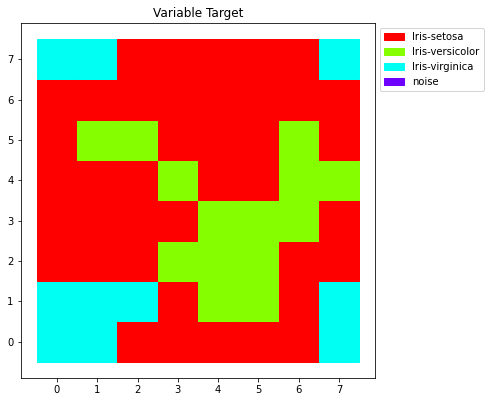

In [44]:

# _plot.tiles(som.positions, 
#          som.hexagonal, 
#          labels_k_medoids, 
#          norm=False, 
#          title='Clustering con K-medoids. Valor de K = ' + str(clusters), 
#          labels=list(range(clusters)),
#          size=7)

# _plot.tiles(som.positions, 
#           som.hexagonal, 
#           labels_target_num, 
#           norm=False, 
#           title='Variable Target', 
#           labels=np.unique(labels_target),
#           size=7)

In [45]:
evaluation = {'d_reduction_technique': 'neuralmap',
              'clustering_algorithm': 'k-medoids',
              'RI': adjusted_rand_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_medoids'].values),
              'AMI': adjusted_mutual_info_score(cluster_evaluation_df['target'].values, cluster_evaluation_df['c_k_medoids'].values)
              }

evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

### UMAP

#### Clusterización

In [46]:
kmeans_labels = cluster.KMeans(n_clusters=clusters).fit_predict(clusterable_embedding)

#### Evaluación

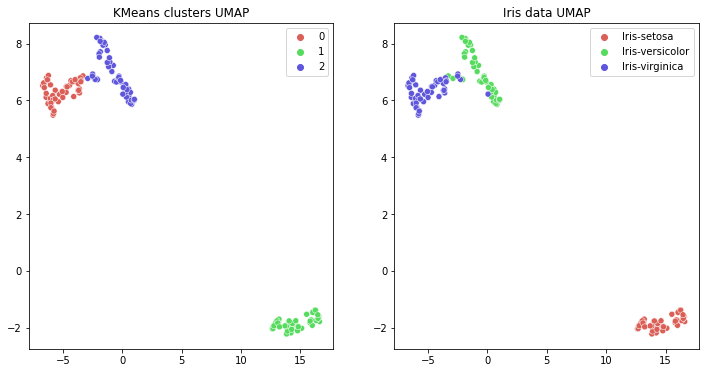

In [47]:
clustered = (kmeans_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=clusterable_embedding[:, 0], 
                y=clusterable_embedding[:, 1], 
                hue=kmeans_labels,
                palette=sns.color_palette("hls", len(np.unique(kmeans_labels))),
                data=data, ax=ax[0]).set(title="KMeans clusters UMAP")

sns.scatterplot(x=clusterable_embedding[:, 0], y=clusterable_embedding[:, 1], hue=iris_train[col_target].values,
                palette=sns.color_palette("hls", len(np.unique(iris_train[col_target].values))),
                data=data, ax=ax[1]).set(title="Iris data UMAP");

plt.show()

In [48]:
evaluation = {'d_reduction_technique': 'umap',
              'clustering_algorithm': 'k-means',
              'RI': adjusted_rand_score(iris_train[col_target].values, kmeans_labels),
              'AMI': adjusted_mutual_info_score(iris_train[col_target].values, kmeans_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)


### tSNE

#### Clusterización

In [49]:
kmeans_labels = cluster.KMeans(n_clusters=clusters).fit_predict(tsne_proyection)

#### Evaluación

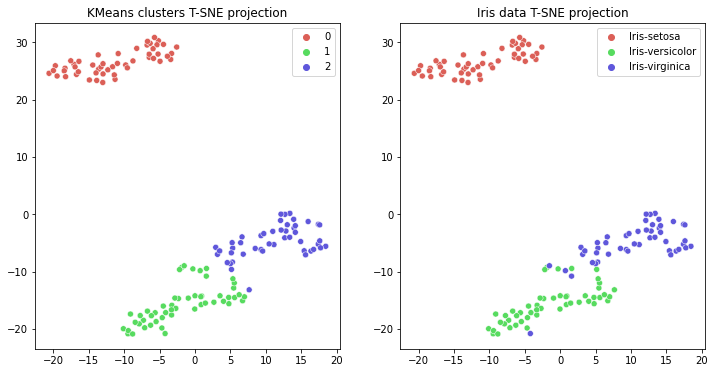

In [50]:
clustered = (kmeans_labels >= 0)

f, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=kmeans_labels,
                palette=sns.color_palette("hls", len(np.unique(kmeans_labels))),
                data=data, ax=ax[0]).set(title="KMeans clusters T-SNE projection")

sns.scatterplot(x=tsne_proyection[:,0], 
                y=tsne_proyection[:,1], 
                hue=iris_train[col_target].values,
                palette=sns.color_palette("hls", len(np.unique(iris_train[col_target].values))),
                data=data, ax=ax[1]).set(title="Iris data T-SNE projection")

plt.show()

In [51]:
evaluation = {'d_reduction_technique': 'tsne',
              'clustering_algorithm': 'k-means',
              'RI': adjusted_rand_score(iris_train[col_target].values, kmeans_labels),
              'AMI': adjusted_mutual_info_score(iris_train[col_target].values, kmeans_labels)
              }
evaluation_results = evaluation_results.append(evaluation, ignore_index = True)

## Resultados

In [52]:
evaluation_results

,d_reduction_technique,clustering_algorithm,RI,AMI
0,neuralmap,hdbscan,0.543752,0.690027
1,umap,hdbscan,0.885792,0.868899
2,tsne,hdbscan,0.656798,0.720839
3,neuralmap,k-means,0.559368,0.615739
4,neuralmap,k-medoids,0.550412,0.594982
5,umap,k-means,0.903768,0.883623
6,tsne,k-means,0.885697,0.862485


In [53]:
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/results_clustering_compare_iris_20.sav'

with open(path, "wb") as f:
  pickle.dump(evaluation_results, f)